# Write the title here

Write introduction here


## Importing the libraries

In [1]:
#importing the necessary libraries

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


### Importing the datasets

In [2]:


from google.colab import files
uploaded = files.upload()

Saving team_matches_event.xlsx to team_matches_event.xlsx


In [3]:
import io

event_matches = pd.read_excel(io.BytesIO(uploaded['team_matches_event.xlsx']))


In [4]:
from google.colab import files
uploaded = files.upload()

Saving German_matches.xlsx to German_matches.xlsx


In [5]:
import io

german_matches = pd.read_excel(io.BytesIO(uploaded['German_matches.xlsx']))

In [6]:
from google.colab import files
uploaded = files.upload()

Saving team_event_merge.xlsx to team_event_merge.xlsx


In [7]:
import io

team_event_merge = pd.read_excel(io.BytesIO(uploaded['team_event_merge.xlsx']))

## Data Preprocessing and Exploratory Data analysis

In [9]:
#exloring the team event merge dataset

team_event_merge.head()

,Unnamed: 0,matchId,teamId,Air duel accurate,Air duel not accurate,Clearance accurate,Clearance not accurate,Corner accurate,Corner not accurate,Cross accurate,...,counter_attack,wyId,Fixtures,home_team,away_team,home_team_goals,away_team_goals,team_name,target,date
0,0,2516739,2444,18,7,1,5,1,3,5,...,16,2516739,Bayern M\u00fcnchen Vs. Bayer Leverkusen,Bayern M\u00fcnchen,Bayer Leverkusen,3,1,FC Bayern M\u00fcnchen,1,"August 18, 2017 at 8:30:00 PM GMT+2"
1,1,2516739,2446,14,14,1,11,3,2,5,...,12,2516739,Bayern M\u00fcnchen Vs. Bayer Leverkusen,Bayern M\u00fcnchen,Bayer Leverkusen,3,1,TSV Bayer 04 Leverkusen,0,"August 18, 2017 at 8:30:00 PM GMT+2"
2,2,2516740,2443,18,7,3,15,3,1,0,...,10,2516740,Hoffenheim Vs. Werder Bremen,Hoffenheim,Werder Bremen,1,0,SV Werder Bremen,0,"August 19, 2017 at 3:30:00 PM GMT+2"
3,3,2516740,2482,11,11,1,3,3,3,1,...,0,2516740,Hoffenheim Vs. Werder Bremen,Hoffenheim,Werder Bremen,1,0,TSG 1899 Hoffenheim,1,"August 19, 2017 at 3:30:00 PM GMT+2"
4,4,2516741,2445,20,16,0,10,0,1,2,...,0,2516741,Hertha BSC Vs. Stuttgart,Hertha BSC,Stuttgart,2,0,VfB Stuttgart 1893,0,"August 19, 2017 at 3:30:00 PM GMT+2"


In [10]:
#exploring the event matches dataset

event_matches.head()

,matchId,teamId,Air duel accurate,Air duel not accurate,Clearance accurate,Clearance not accurate,Corner accurate,Corner not accurate,Cross accurate,Cross not accurate,...,Touch dangerous_ball_lost,Touch Feint,Touch missed ball,Violent Foul red_card,Violent Foul yellow_card,opportunity,interception,assist,keyPass,counter_attack
0,2516739,2444,18,7,1,5,1,3,5,5,...,1,1,1,0,0,9,39,2,5,16
1,2516739,2446,14,14,1,11,3,2,5,8,...,0,1,4,0,0,14,35,1,5,12
2,2516740,2443,18,7,3,15,3,1,0,5,...,0,0,7,0,0,6,57,0,3,10
3,2516740,2482,11,11,1,3,3,3,1,16,...,0,0,2,0,0,8,30,1,3,0
4,2516741,2445,20,16,0,10,0,1,2,7,...,0,0,2,0,0,5,32,0,1,0


In [11]:
#exploring the team event merge dataset

team_event_merge.head()

,Unnamed: 0,matchId,teamId,Air duel accurate,Air duel not accurate,Clearance accurate,Clearance not accurate,Corner accurate,Corner not accurate,Cross accurate,...,counter_attack,wyId,Fixtures,home_team,away_team,home_team_goals,away_team_goals,team_name,target,date
0,0,2516739,2444,18,7,1,5,1,3,5,...,16,2516739,Bayern M\u00fcnchen Vs. Bayer Leverkusen,Bayern M\u00fcnchen,Bayer Leverkusen,3,1,FC Bayern M\u00fcnchen,1,"August 18, 2017 at 8:30:00 PM GMT+2"
1,1,2516739,2446,14,14,1,11,3,2,5,...,12,2516739,Bayern M\u00fcnchen Vs. Bayer Leverkusen,Bayern M\u00fcnchen,Bayer Leverkusen,3,1,TSV Bayer 04 Leverkusen,0,"August 18, 2017 at 8:30:00 PM GMT+2"
2,2,2516740,2443,18,7,3,15,3,1,0,...,10,2516740,Hoffenheim Vs. Werder Bremen,Hoffenheim,Werder Bremen,1,0,SV Werder Bremen,0,"August 19, 2017 at 3:30:00 PM GMT+2"
3,3,2516740,2482,11,11,1,3,3,3,1,...,0,2516740,Hoffenheim Vs. Werder Bremen,Hoffenheim,Werder Bremen,1,0,TSG 1899 Hoffenheim,1,"August 19, 2017 at 3:30:00 PM GMT+2"
4,4,2516741,2445,20,16,0,10,0,1,2,...,0,2516741,Hertha BSC Vs. Stuttgart,Hertha BSC,Stuttgart,2,0,VfB Stuttgart 1893,0,"August 19, 2017 at 3:30:00 PM GMT+2"


In [12]:
#copying the dataset into a second dataset for further processing

event_team_matches_details_copy = team_event_merge.copy()

In [13]:
#Viewing the columns in a list

event_team_matches_details_copy.columns.to_list()

['Unnamed: 0',
 'matchId',
 'teamId',
 'Air duel accurate',
 'Air duel not accurate',
 'Clearance accurate',
 'Clearance not accurate',
 'Corner accurate',
 'Corner not accurate',
 'Cross accurate',
 'Cross not accurate',
 'Foul counter_attack',
 'Foul red_card',
 'Foul second_yellow_card',
 'Foul yellow_card',
 'Free Kick accurate',
 'Free kick cross accurate',
 'Free kick cross not accurate',
 'Free Kick not accurate',
 'Free kick shot accurate',
 'Free kick shot not accurate',
 'Ground attacking duel accurate',
 'Ground attacking duel not accurate',
 'Ground defending duel accurate',
 'Ground defending duel not accurate',
 'Ground defending duel second_yellow_card',
 'Ground loose ball duel accurate',
 'Ground loose ball duel not accurate',
 'Hand foul counter_attack',
 'Hand foul red_card',
 'Hand foul yellow_card',
 'Head pass accurate',
 'Head pass not accurate',
 'High pass accurate',
 'High pass not accurate',
 'Late card foul second_yellow_card',
 'Late card foul yellow_card',

In [14]:
#extracting the essential columns. Leaving out the target variable

event_matches_filtered = event_team_matches_details_copy[['Air duel accurate',
 'Air duel not accurate',
 'Clearance accurate',
 'Clearance not accurate',
 'Corner accurate',
 'Corner not accurate',
 'Cross accurate',
 'Cross not accurate',
 'Foul counter_attack',
 'Foul red_card',
 'Foul second_yellow_card',
 'Foul yellow_card',
 'Free Kick accurate',
 'Free kick cross accurate',
 'Free kick cross not accurate',
 'Free Kick not accurate',
 'Free kick shot accurate',
 'Free kick shot not accurate',
 'Ground attacking duel accurate',
 'Ground attacking duel not accurate',
 'Ground defending duel accurate',
 'Ground defending duel not accurate',
 'Ground defending duel second_yellow_card',
 'Ground loose ball duel accurate',
 'Ground loose ball duel not accurate',
 'Hand foul counter_attack',
 'Hand foul red_card',
 'Hand foul yellow_card',
 'Head pass accurate',
 'Head pass not accurate',
 'High pass accurate',
 'High pass not accurate',
 'Late card foul second_yellow_card',
 'Late card foul yellow_card',
 'Out of game foul red_card',
 'Out of game foul second_yellow_card',
 'Out of game foul yellow_card',
 'Protest second_yellow_card',
 'Protest yellow_card',
 'Shot accurate',
 'Shot not accurate',
 'Simple pass accurate',
 'Simple pass not accurate',
 'Simulation second_yellow_card',
 'Simulation yellow_card',
 'Smart pass accurate',
 'Smart pass not accurate',
 'Throw in accurate',
 'Throw in not accurate',
 'Time lost foul yellow_card',
 'Touch dangerous_ball_lost',
 'Touch Feint',
 'Touch missed ball',
 'Violent Foul red_card',
 'Violent Foul yellow_card',
 'opportunity',
 'interception',
 'assist',
 'keyPass',
 'counter_attack']]

In [15]:
#viewing the filtered dataset

event_matches_filtered

,Air duel accurate,Air duel not accurate,Clearance accurate,Clearance not accurate,Corner accurate,Corner not accurate,Cross accurate,Cross not accurate,Foul counter_attack,Foul red_card,...,Touch dangerous_ball_lost,Touch Feint,Touch missed ball,Violent Foul red_card,Violent Foul yellow_card,opportunity,interception,assist,keyPass,counter_attack
0,18,7,1,5,1,3,5,5,0,0,...,1,1,1,0,0,9,39,2,5,16
1,14,14,1,11,3,2,5,8,0,0,...,0,1,4,0,0,14,35,1,5,12
2,18,7,3,15,3,1,0,5,0,0,...,0,0,7,0,0,6,57,0,3,10
3,11,11,1,3,3,3,1,16,0,0,...,0,0,2,0,0,8,30,1,3,0
4,20,16,0,10,0,1,2,7,0,0,...,0,0,2,0,0,5,32,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,17,13,2,6,2,1,1,5,0,0,...,0,0,9,0,0,5,41,0,2,7
608,29,15,5,11,4,3,9,24,0,0,...,0,1,5,0,0,9,49,2,2,12
609,20,24,4,14,1,2,7,11,0,0,...,0,2,1,0,0,11,55,0,3,7
610,22,16,2,8,3,2,8,12,0,0,...,0,0,0,0,0,16,48,2,2,23


In [16]:
#Putting the datasets into X and y

X = event_matches_filtered
y = event_team_matches_details_copy['target']

The target variable is win or loss in a match. It makes the dataset a binary classification dataset.

### Dividing the dataset into test and train split. 
The training set shall contain 70% of the total dataset and 30% shall be put into test set

In [17]:
#train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
dfObj = pd.DataFrame(columns=['Model', 'Accuracy', 'Rec', 'Prec', 'F1_Score'])

## Implementation of machine learning algorithms

### Decision Trees

In [19]:
# Implementation of decision tree algorithm and producing the classification report along with the confusion matrix.


model_DecisionTree = DecisionTreeClassifier(random_state=100)
#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,y_train)
Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
print(list(zip(y_test,Y_pred)))
#EVALUATE THE MODEL

cfm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix: ", cfm)
acc=accuracy_score(y_test,Y_pred)
print("Accuracy :", acc)

rec = recall_score(y_test, Y_pred, average="weighted")
print("Recall: ", rec)
prec = precision_score(y_test, Y_pred, average="weighted")
print("Precision: ", prec)
f1_score = 2 * ((prec * rec) / (prec + rec))
print("F1 Score: ", f1_score)

dfObj = dfObj.append({'Model': 'Decision Tree', 'Accuracy': acc, 'Rec': rec, 'Prec': prec, 'F1_Score': f1_score}, ignore_index=True)

[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 0), (0, 0),

### Variable importance for decision trees

Feature: 0, Score: 0.00955
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01943
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.02972
Feature: 6, Score: 0.00921
Feature: 7, Score: 0.00920
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.03100
Feature: 12, Score: 0.02283
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01517
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00947
Feature: 18, Score: 0.00979
Feature: 19, Score: 0.01751
Feature: 20, Score: 0.02212
Feature: 21, Score: 0.00459
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01294
Feature: 24, Score: 0.04841
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00759
Feature: 28, Score: 0.02273
Feature: 29, Score: 0.03376
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

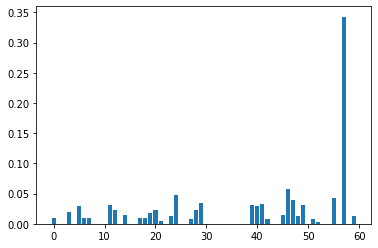

In [20]:
# Plotting the feature importance of variables for the decision tree algorithm.


model_DecisionTree_feature_importance_list = []
importance = model_DecisionTree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  model_DecisionTree_feature_importance_list.append([i,v])
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
#feature importance list
model_DecisionTree_feature_importance_list
Data = pd.DataFrame(model_DecisionTree_feature_importance_list)

In [22]:
Data.columns = ['feature_id', 'wt']

In [23]:
Data

,feature_id,wt
0,0,0.009553
1,1,0.000000
2,2,0.000000
3,3,0.019428
4,4,0.000000
5,5,0.029718
6,6,0.009207
7,7,0.009195
8,8,0.000000
9,9,0.000000


In [24]:
#exporting the feature extraction data of decision tree into an excel file
Data.to_excel('Dt_features_weights.xlsx')

### Support Vector Machine

In [57]:

classifier=svm.SVC(kernel='linear',gamma=0.1,C=1.0)
#fitting training data to the model
classifier.fit(X_train,y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(y_test,Y_pred)))
acc=accuracy_score(y_test,Y_pred)
print(acc)
#EVALUATE THE MODEL


print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))
print(accuracy_score(y_test, Y_pred))

[(0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0),

Air duel accurate                           0.014423
Air duel not accurate                       0.003829
Clearance accurate                          0.059985
Clearance not accurate                      0.002832
Corner accurate                             0.006430
Corner not accurate                         0.092195
Cross accurate                              0.051563
Cross not accurate                          0.018389
Foul counter_attack                         0.020150
Foul red_card                               0.044609
Foul second_yellow_card                     0.000095
Foul yellow_card                            0.041821
Free Kick accurate                          0.024119
Free kick cross accurate                    0.053359
Free kick cross not accurate                0.081362
Free Kick not accurate                      0.067647
Free kick shot accurate                     0.021892
Free kick shot not accurate                 0.099974
Ground attacking duel accurate              0.

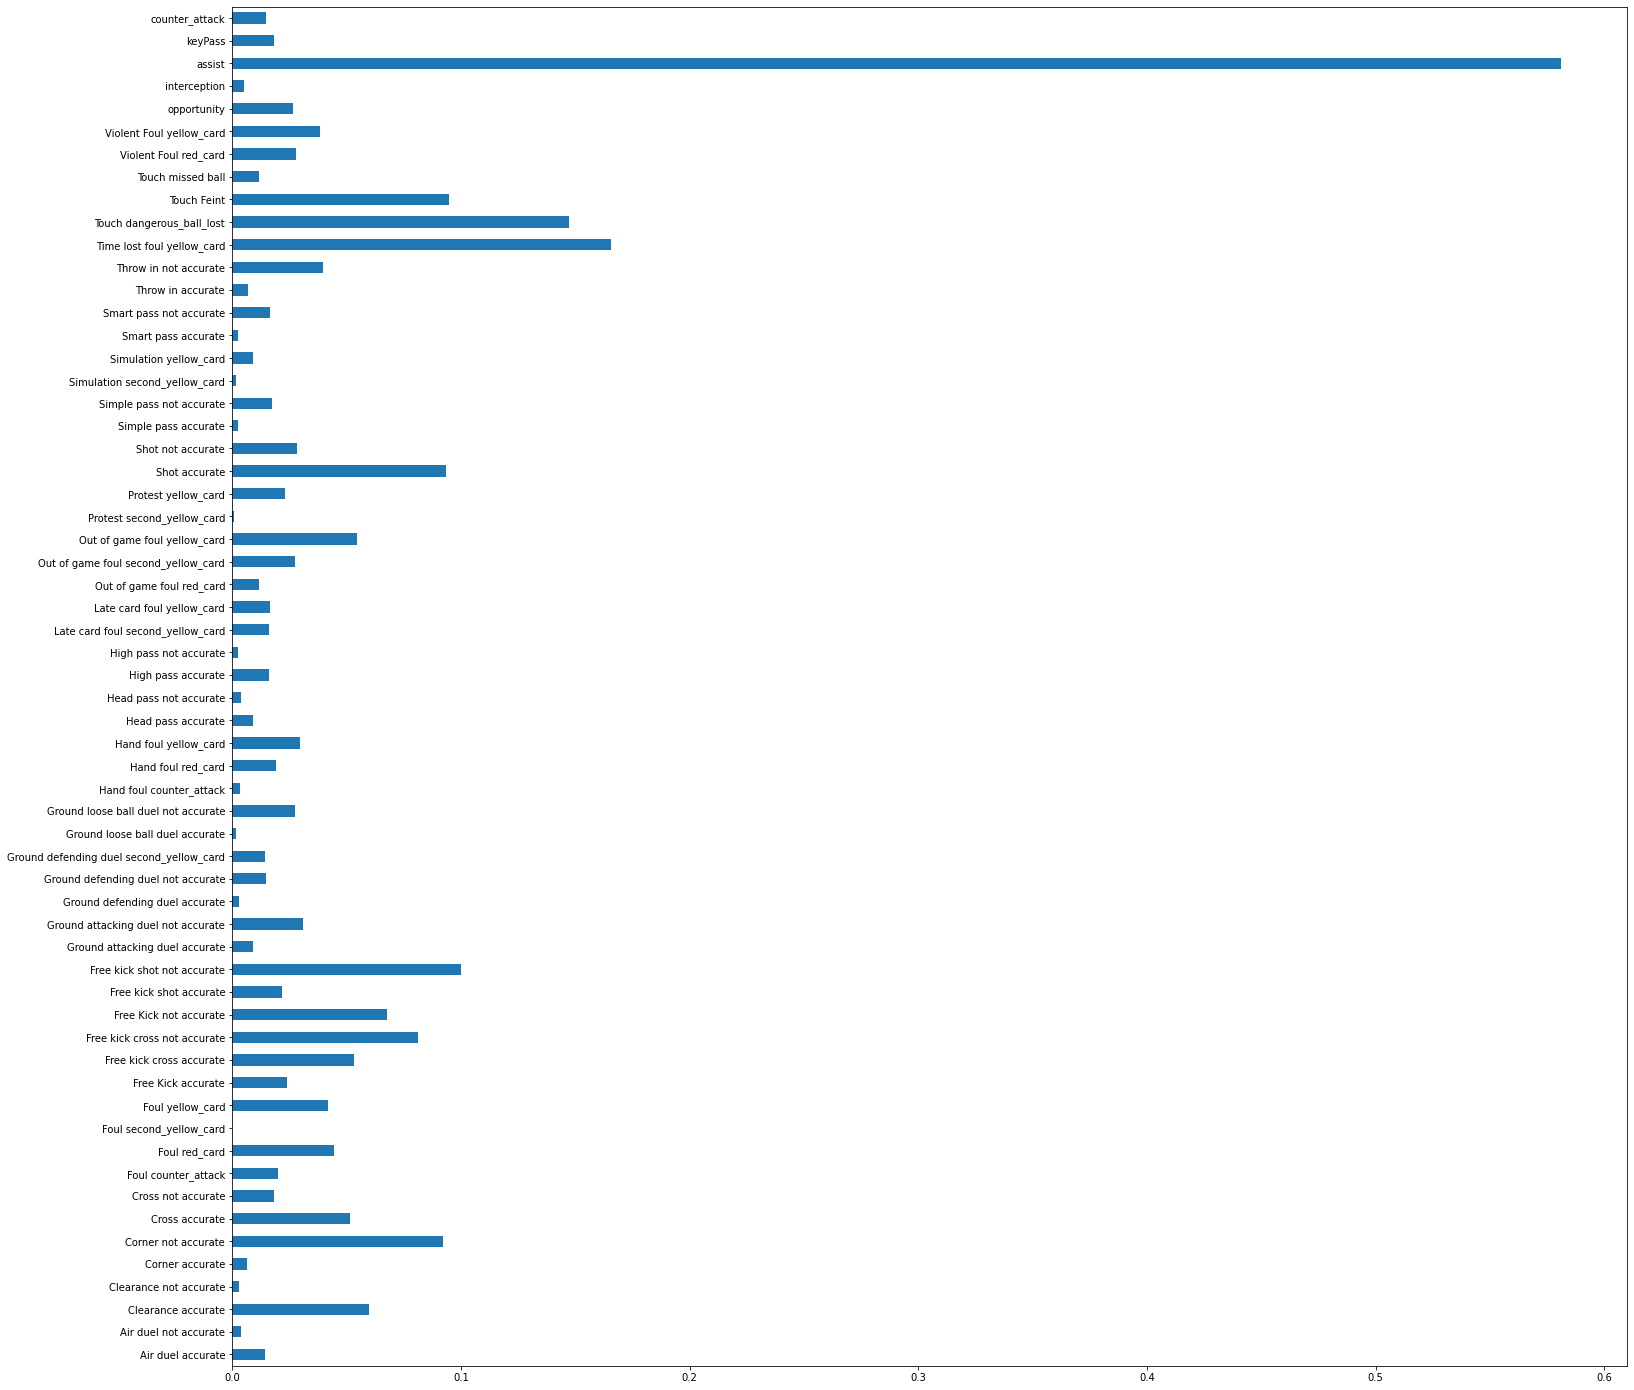

In [58]:
#Variable importance of the support vector machine algorithm.

svm_features = pd.Series(abs(spvm.coef_[0]), index=X_train.columns)
print(svm_features)
svm_features.plot(kind='barh',figsize = (25,25))

In [59]:
#exporting the feature extraction data of svm into an excel file
svm_features.to_excel('svm_features_weights.xlsx')

### Gradient Boosting Classifier

In [32]:
#Implemeting the gradient boosting classifier and printing the confusion matrix and accuracy score

model_GradientBoosting=GradientBoostingClassifier(n_estimators=105,random_state=2)
#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,y_train)

Y_pred_gb = model_GradientBoosting.predict(X_test)

print("===== Gradient Boosting Classifier =====")
cfm = confusion_matrix(y_test, Y_pred_gb)
print("Confusion Matrix :", cfm)
acc=accuracy_score(y_test,Y_pred_gb)
print("Accuracy :",acc)

rec = recall_score(y_test, Y_pred_gb, average="weighted")
print("Recall: ", rec)
prec = precision_score(y_test, Y_pred_gb, average="weighted")
print("Precision: ", prec)
f1_score = 2 * ((prec * rec) / (prec + rec))
print("F1 Score: ", f1_score)

dfObj = dfObj.append({'Model': 'Gradient Boosting', 'Accuracy': acc, 'Rec': rec, 'Prec': prec, 'F1_Score': f1_score}, ignore_index=True)

===== Gradient Boosting Classifier =====
Confusion Matrix : [[104  14]
 [ 24  42]]
Accuracy : 0.7934782608695652
Recall:  0.7934782608695652
Precision:  0.7900815217391305
F1 Score:  0.7917762482979874


Feature: 0, Score: 0.00428
Feature: 1, Score: 0.00739
Feature: 2, Score: 0.01525
Feature: 3, Score: 0.02156
Feature: 4, Score: 0.00998
Feature: 5, Score: 0.02504
Feature: 6, Score: 0.02617
Feature: 7, Score: 0.03245
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00045
Feature: 12, Score: 0.01055
Feature: 13, Score: 0.00161
Feature: 14, Score: 0.00325
Feature: 15, Score: 0.01404
Feature: 16, Score: 0.00047
Feature: 17, Score: 0.00918
Feature: 18, Score: 0.01910
Feature: 19, Score: 0.00590
Feature: 20, Score: 0.00374
Feature: 21, Score: 0.01589
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01239
Feature: 24, Score: 0.01649
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.02644
Feature: 29, Score: 0.00569
Feature: 30, Score: 0.01140
Feature: 31, Score: 0.01073
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00018
Fe

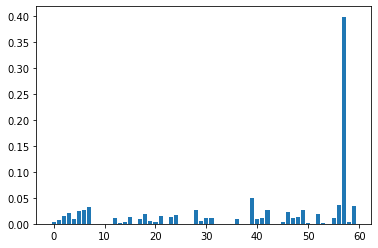

In [33]:
#Extracting variable importance from the gradient boosting classifier


model_GradientBoosting_feature_importance_list = []
importance = model_GradientBoosting.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  model_GradientBoosting_feature_importance_list.append([i,v])
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [34]:
#feature importance list
model_GradientBoosting_feature_importance_list
Data = pd.DataFrame(model_GradientBoosting_feature_importance_list)

In [35]:
#extracting the feature importance into feature_id and weights

Data.columns = ['feature_id', 'wt']

In [36]:
Data

,feature_id,wt
0,0,4.280384e-03
1,1,7.391267e-03
2,2,1.524741e-02
3,3,2.155604e-02
4,4,9.977731e-03
5,5,2.504261e-02
6,6,2.616541e-02
7,7,3.245380e-02
8,8,0.000000e+00
9,9,0.000000e+00


In [37]:
#exporting the feature and weights into an excel file.

Data.to_excel('GB_features_weights.xlsx')

### Random Forest

In [38]:
#Implementing the random forest classifier

clf = RandomForestClassifier(max_depth=20, random_state=1)

In [39]:
#fitting the classifier on training dataset
rf_clf = clf.fit(X_train, y_train)

In [40]:
#predicting on the random forest classifier

rf_clf_pred = rf_clf.predict(X_test)

In [41]:
print("===== Random Forest Classifier =====")
cfm = confusion_matrix(y_test, rf_clf_pred)
print("Confusion Matrix :", cfm)
acc=accuracy_score(y_test,rf_clf_pred)
print("Accuracy :",acc)

rec = recall_score(y_test, rf_clf_pred, average="weighted")
print("Recall: ", rec)
prec = precision_score(y_test, rf_clf_pred, average="weighted")
print("Precision: ", prec)
f1_score = 2 * ((prec * rec) / (prec + rec))
print("F1 Score: ", f1_score)

dfObj = dfObj.append({'Model': 'Random Forest', 'Accuracy': acc, 'Rec': rec, 'Prec': prec, 'F1_Score': f1_score}, ignore_index=True)

===== Random Forest Classifier =====
Confusion Matrix : [[104  14]
 [ 25  41]]
Accuracy : 0.7880434782608695
Recall:  0.7880434782608695
Precision:  0.7844118638355242
F1 Score:  0.7862234774081674


Feature: 0, Score: 0.01976
Feature: 1, Score: 0.01861
Feature: 2, Score: 0.01125
Feature: 3, Score: 0.02708
Feature: 4, Score: 0.01572
Feature: 5, Score: 0.01515
Feature: 6, Score: 0.02065
Feature: 7, Score: 0.02806
Feature: 8, Score: 0.00031
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00111
Feature: 11, Score: 0.00955
Feature: 12, Score: 0.01975
Feature: 13, Score: 0.00956
Feature: 14, Score: 0.00967
Feature: 15, Score: 0.02202
Feature: 16, Score: 0.00419
Feature: 17, Score: 0.00702
Feature: 18, Score: 0.02453
Feature: 19, Score: 0.01822
Feature: 20, Score: 0.02643
Feature: 21, Score: 0.01867
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.02477
Feature: 24, Score: 0.02421
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00012
Feature: 27, Score: 0.00042
Feature: 28, Score: 0.02241
Feature: 29, Score: 0.01765
Feature: 30, Score: 0.02419
Feature: 31, Score: 0.01976
Feature: 32, Score: 0.00007
Feature: 33, Score: 0.00249
Feature: 34, Score: 0.00019
Feature: 35, Score: 0.00007
Fe

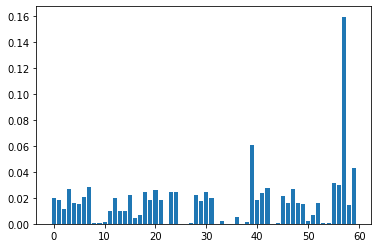

In [42]:

importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [43]:
#exporting the feature extraction data of random forest into an excel file
pd.DataFrame(rf_clf.feature_importances_).to_excel('RF_features_weights.xlsx')

### Logistic regression


In [44]:
#logistic regression


clf = LogisticRegression(random_state=0, max_iter = 170)



In [45]:
lr_clf = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
lr_clf_pred = lr_clf.predict(X_test)

In [47]:
print("===== Logistic Regression =====")
cfm = confusion_matrix(y_test, lr_clf_pred)
print("Confusion Matrix :", cfm)
acc=accuracy_score(y_test,lr_clf_pred)
print("Accuracy :",acc)

rec = recall_score(y_test, lr_clf_pred, average="weighted")
print("Recall: ", rec)
prec = precision_score(y_test, lr_clf_pred, average="weighted")
print("Precision: ", prec)
f1_score = 2 * ((prec * rec) / (prec + rec))
print("F1 Score: ", f1_score)

dfObj = dfObj.append({'Model': 'Logstic Regression', 'Accuracy': acc, 'Rec': rec, 'Prec': prec, 'F1_Score': f1_score}, ignore_index=True)

===== Logistic Regression =====
Confusion Matrix : [[103  15]
 [ 20  46]]
Accuracy : 0.8097826086956522
Recall:  0.8097826086956522
Precision:  0.8075190213769564
F1 Score:  0.808649230969531


Feature: 0, Score: 0.04075
Feature: 1, Score: 0.00670
Feature: 2, Score: -0.28004
Feature: 3, Score: 0.04465
Feature: 4, Score: 0.06946
Feature: 5, Score: -0.32050
Feature: 6, Score: -0.19913
Feature: 7, Score: -0.06217
Feature: 8, Score: -0.03018
Feature: 9, Score: -0.05203
Feature: 10, Score: -0.03329
Feature: 11, Score: -0.26911
Feature: 12, Score: -0.08966
Feature: 13, Score: -0.19546
Feature: 14, Score: -0.20825
Feature: 15, Score: 0.39406
Feature: 16, Score: 0.03173
Feature: 17, Score: 0.20545
Feature: 18, Score: 0.01919
Feature: 19, Score: -0.08785
Feature: 20, Score: 0.01073
Feature: 21, Score: -0.04825
Feature: 22, Score: -0.02225
Feature: 23, Score: 0.01912
Feature: 24, Score: 0.07341
Feature: 25, Score: 0.02339
Feature: 26, Score: -0.01816
Feature: 27, Score: -0.05741
Feature: 28, Score: -0.02217
Feature: 29, Score: -0.03477
Feature: 30, Score: -0.03572
Feature: 31, Score: -0.03217
Feature: 32, Score: -0.00974
Feature: 33, Score: 0.00503
Feature: 34, Score: -0.05251
Feature:

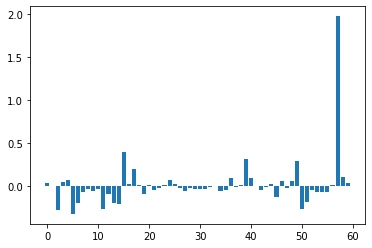

In [48]:

importance = lr_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [49]:
#exporting the feature extraction data of svm into an excel file
pd.DataFrame(lr_clf.coef_).to_excel('LR_features_weights.xlsx')

#### Plotting the Classification report for all algorithms

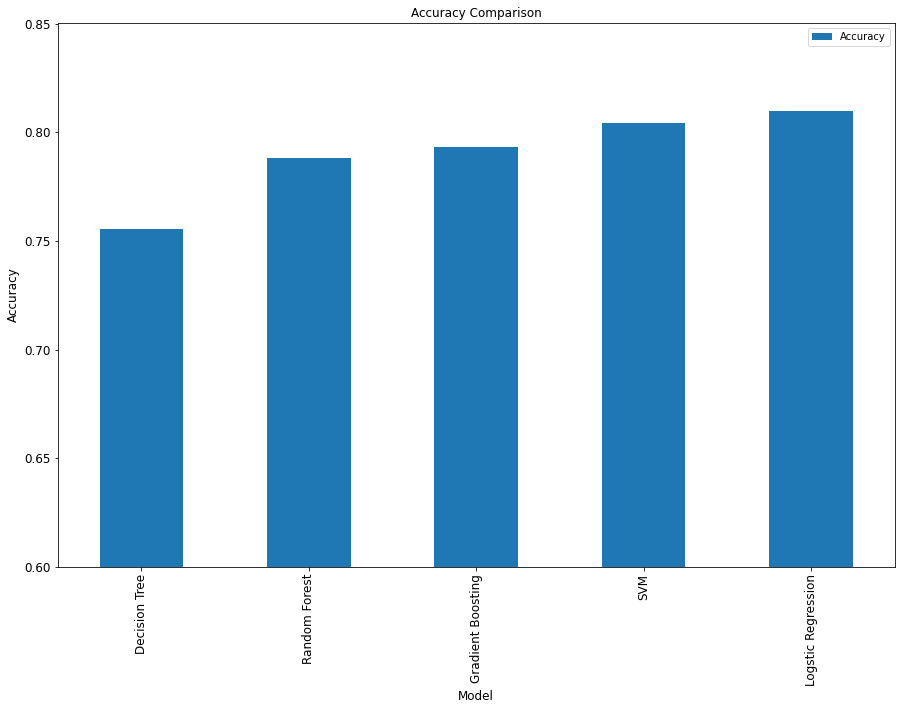

In [50]:
dfObj

df1 = dfObj.sort_values('Accuracy')
ax = df1[['Accuracy']].plot(kind='bar', title ="Accuracy Comparison", figsize=(15, 10),legend=True, fontsize=12, use_index = False)
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_xticklabels(df1.Model)
ax.set_ylim(0.6,)
plt.show()